In [1]:
import utils
import circular
import unbiasedmcmc as umcmc

import numpy as np
import time

#### Discrete Chains

In [2]:
N = 200
reps = 100000
pi, K = utils.generate_discrete_chain(d=12, seed=1234)

## Discrete Circular Coupler
# coupler = circular.DiscreteCircularCoupler(N, reps, K)
# x = coupler.forward()
# y = coupler.backward()

ucoupler = umcmc.DiscreteUMCMC(m=N, reps=reps, K=K)
ucoupler.sample_all(verbose=True)

At iteration=100, 100.0% of the chains are converged
At iteration=200, 100.0% of the chains are converged
Breaking at iteration=200


In [3]:
est = ucoupler.compute_Hkm(k=2).mean()
std = ucoupler.compute_Hkm(k=2).std() / np.sqrt(10000)
print(est - 2*std, est + 2*std)

5.558930766537651 5.569015294068409


In [4]:
np.sum(np.arange(12) * pi)

5.56480738081578

In [5]:
ucoupler.xs

array([[[ 7.,  7.,  4., ..., 11.,  9.,  0.]],

       [[ 6., 11., 10., ...,  0.,  4.,  5.]],

       [[ 8.,  9.,  5., ..., 11.,  4.,  2.]],

       ...,

       [[ 5., 11.,  4., ...,  0.,  8.,  1.]],

       [[ 7., 11.,  7., ...,  4.,  6.,  7.]],

       [[11.,  3.,  7., ...,  9.,  3.,  0.]]])

#### Contractive Chains

In [6]:
import numpy as np
reps = 10000

coupler = circular.ContractiveCircularCoupler(N, reps)
x = coupler.forward()
y = coupler.backward()
print(coupler.convergence_times())


coupler = circular.ApprxContractiveCircularCoupler(N, reps, dec=3)
x = coupler.forward()
y = coupler.backward()
print(coupler.convergence_times().mean())
print(coupler.convergence_times().std() / np.sqrt(reps))

ucoupler = umcmc.ContractiveUMCMC(N, reps)
ucoupler.sample_all()
print(ucoupler.taus)

ucoupler = umcmc.ApprxContractiveUMCMC(N, reps)
ucoupler.sample_all()
print(ucoupler.taus.mean())
print(ucoupler.taus.std() / np.sqrt(reps))


[57. 54. 50. ... 59. 52. 54.]
11.0688
0.022304857228863852
[58. 55. 57. ... 48. 53. 52.]
10.9511
0.02650039394046813


#### Ising

In [4]:
N = 1000
reps = 100
D = 32
ccoupler = circular.IsingCircularCoupler(N, reps, D, theta=0.4)
x = ccoupler.forward()
#print("Finished forward")
y = ccoupler.backward()
#print("Finished backward")
ccoupler.convergence_times()

array([107.,  78., 247., 106., 171., 240., 116., 234., 225., 114., 207.,
        86., 117., 158., 158., 347., 122.,  98.,  86., 247., 135.,  68.,
       211., 117., 134.,  99., 218., 135.,  83., 258., 157., 106.,  89.,
        79., 240., 250., 103., 180., 121.,  79., 101., 219., 115., 113.,
       145., 117., 144., 173.,  78., 370., 212., 181., 172., 141., 242.,
       305., 259., 152., 129., 149.,  87., 216., 217.,  37., 144., 123.,
       436., 138.,  47., 147., 166., 221., 108.,  65., 166., 212., 163.,
       212., 429.,  79., 298., 178., 331., 121., 250., 255., 136., 211.,
       393.,  54., 284., 200., 178., 141., 135., 149., 264., 133.,  71.,
       147.])

In [6]:
utils.ising_statistic(x).mean()

1131.06704

In [10]:
np.random.seed(123)
time0 = time.time()
coupler = umcmc.IsingUMCMC(m=N, reps=reps, D=D, theta=0.4)
coupler.sample_all(verbose=True)

At iteration=100, 33.0% of the chains are converged
At iteration=200, 77.0% of the chains are converged
At iteration=300, 91.0% of the chains are converged
At iteration=400, 97.0% of the chains are converged
At iteration=500, 98.0% of the chains are converged
At iteration=600, 99.0% of the chains are converged
At iteration=700, 99.0% of the chains are converged
At iteration=800, 100.0% of the chains are converged
At iteration=900, 100.0% of the chains are converged
At iteration=1000, 100.0% of the chains are converged
Breaking at iteration=1000


In [11]:
tstats = coupler.compute_Hkm(k=100, h=utils.ising_statistic)

In [15]:
# import seaborn as sns
# print(tstats.shape)
# sns.displot(tstats)
tstats.mean()

1172.4509777777778

In [126]:
one_ising = coupler.xs[-1][:].reshape(1, D**2, -1)
onestat = utils.ising_statistic(one_ising)

In [127]:
onestat

array([[ -92.,  -36.,    8., -136., -148.,  172.,  -84.,   24.,   -4.,
          40.,    0.,   56.,  -16.,  -68., -184.,   68.,    8.,  124.,
         -96.,  140.,    0.,   76.,  104.,  -64., -152.,   76.,   24.,
          -4.,   16.,   80.,   60.,    8.,  228.,  -48.,  -28.,  -92.,
         -28.,  -76.,  -64.,   20.,  -60.,  120., -116.,   96., -140.,
         -16.,  -52.,  -48.,   84.,  -16.,    8.,    8.,  -40.,  104.,
          32.,  -12., -128.,   -4.,   16.,   32., -136.,  104.,  -56.,
        -112.,  -36.,   28.,   80.,    4.,    4.,    0.,   96.,    0.,
          28.,   24.,   28.,  -60.,  -32.,   28.,   36.,    8.,   80.,
           8.,   44.,  -20.,   24.,    4.,  -72.,   48.,  -56.,  -24.,
          32.,    4.,   -8., -132.,  -64.,   12.,   72.,   80.,  112.,
          12.]])

<AxesSubplot:>

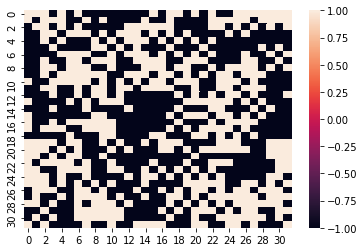

In [128]:
grid = coupler.xs[-1][:, -1].reshape(D, D)
sns.heatmap(grid)

In [130]:
onestat.mean()

-0.28

array([[-20.]])